In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# File path
file_path = '/content/drive/MyDrive/IMBD/Movie sarcasm Final Dataset.xlsx'

In [5]:
# Read Excel file
import pandas as pd
df = pd.read_excel(file_path)

In [6]:
# Display the first 5 rows of data
df.head()

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic


In [7]:
# Check for duplicate values
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 29


In [8]:
# Display the duplicate rows
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                                                 Review Sentiment  \
38    I watched this film not really expecting much,...  Negative   
39    I bought this film at Blockbuster for $3.00, b...  Negative   
41    Ever watched a movie that lost the plot? Well,...  Negative   
260   A cinematic marvel! It's like they took all th...  Positive   
261   The dialogue was so sharp, it could cut throug...  Positive   
416           The director's vision is clear... as mud.  Negative   
417   The screenplay is truly groundbreaking... if y...  Negative   
418   The acting performances are unforgettable... b...  Negative   
419   The cinematography is breathtaking... if you'r...  Negative   
420   The soundtrack is memorable... in the same way...  Negative   
421   The character dynamics are engaging... if you ...  Negative   
422   The plot twists are shocking... because you ca...  Negative   
423   The special effects are out of this world... i...  Negative   
424   The editing 

In [13]:
# Checking for duplicates based on 'Review', 'Sentiment'and 'Sarcasm'
specific_duplicates = df.duplicated(subset=['Review', 'Sentiment','Sarcasm'])
print(f"Number of duplicate rows based on specific columns: {specific_duplicates.sum()}")

Number of duplicate rows based on specific columns: 29


In [14]:
# Remove duplicate rows from the entire dataframe
df_no_duplicates = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df_no_duplicates.shape[0]}")

Number of rows after removing duplicates: 6515


In [16]:
# Check the count of unique values in the 'sentiment' column and 'sarcasm' column
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sarcasm' column:")
print(sarcasm_counts)


Count of unique values in the 'sentiment' column:
Sentiment
Negative     2786
positive     1478
negative     1430
Positive      833
Neutral        15
Nositive        1
Negative        1
Name: count, dtype: int64
Count of unique values in the 'sarcasm' column:
Sarcasm
Sarcastic         3531
Not Sarcastic     1060
Not sarcastic      918
Non-Sarcastic      892
not Sarcastic       62
Non-sarcastic       30
non-sarcastic       16
sarcastic           14
Non-Sarcastic        3
Sarcasm              2
Non-sarcasm          1
nsa                  1
Sarcastic            1
Name: count, dtype: int64


In [17]:
# Normalize the values
df['Sentiment'] = df['Sentiment'].str.lower()
df['Sarcasm'] = df['Sarcasm'].str.lower()

In [19]:
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative     4216
positive     2311
neutral        15
nositive        1
negative        1
Name: count, dtype: int64


In [20]:
# Change the value
df['Sentiment'] = df['Sentiment'].replace({'negative ': 'negative', 'nositive': 'positive'})

In [21]:
# Again check Values
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative    4217
positive    2312
neutral       15
Name: count, dtype: int64


In [22]:
# Check for 'Sarcasm'
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic         3545
not sarcastic     2040
non-sarcastic      938
non-sarcastic        3
sarcasm              2
non-sarcasm          1
nsa                  1
sarcastic            1
Name: count, dtype: int64


In [29]:
# Change the label
df['Sarcasm'] = df['Sarcasm'].replace({'sarcastic ': 'sarcastic', 'sarcasm': 'sarcastic', 'not sarcastic': 'non-sarcastic', 'nsa': 'non-sarcastic', 'non-sarcastic ': 'non-sarcastic', 'non-sarcasm': 'non-sarcastic'})

In [30]:
# Again Check for 'Sarcasm' column
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic        3548
non-sarcastic    2983
Name: count, dtype: int64


In [32]:
# Count of each combination of sentiment and sarcasm
combination_counts = df.groupby(['Sentiment', 'Sarcasm']).size().reset_index(name='counts')
print(combination_counts)

  Sentiment        Sarcasm  counts
0  negative  non-sarcastic    1027
1  negative      sarcastic    3186
2   neutral      sarcastic      13
3  positive  non-sarcastic    1956
4  positive      sarcastic     349


In [35]:
# Remove HTML tags from the text columns
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# 'Review' column has the text data with HTML tags
df['Review'] = df['Review'].apply(remove_html_tags)

# Verify the changes
df.head()

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,non-sarcastic
1,A wonderful little production. The filming tec...,positive,non-sarcastic
2,This movie was a groundbreaking experience! I'...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,non-sarcastic
4,Basically there's a family where a little boy ...,negative,sarcastic


In [37]:
# Clean the reviews
def clean_review(text):
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove double quotation marks
    text = text.replace('""', '')
    # Remove single quotation marks
    text = text.replace('"', '')
    return text

df['Review'] = df['Review'].apply(clean_review)

In [43]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80's and it's currently ...,negative,non-sarcastic
196,Phantasm ....Class. Phantasm II.....awesome. P...,negative,non-sarcastic
197,Ludicrous. Angelic 9-year-old Annakin turns in...,negative,non-sarcastic
198,"Scotty (Grant Cramer, who would go on to star ...",negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


In [44]:
# Clean the special symbols
import re

def clean_review(text):
    # Remove ellipses
    text = re.sub(r'\.\.\.', '', text)
    # Remove asterisks
    text = re.sub(r'\*{5}', '', text)
    # Remove special symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

df['Review'] = df['Review'].apply(clean_review)

In [45]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80s and its currently sh...,negative,non-sarcastic
196,Phantasm Class Phantasm IIawesome Phantasm III...,negative,non-sarcastic
197,Ludicrous Angelic 9yearold Annakin turns into ...,negative,non-sarcastic
198,Scotty Grant Cramer who would go on to star in...,negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


In [46]:
# Calculate the percentage of sarcasm
sarcasm_percentage = (df['Sarcasm'].value_counts(normalize=True) * 100).round(2)
sarcasm_percentage

Sarcasm
sarcastic        54.33
non-sarcastic    45.67
Name: proportion, dtype: float64

In [47]:
# Calculate the percentage of each combination of sentiment and sarcasm
combination_percentage = (df.groupby(['Sentiment', 'Sarcasm']).size() / len(df) * 100).round(2)
combination_percentage

Sentiment  Sarcasm      
negative   non-sarcastic    15.69
           sarcastic        48.69
neutral    sarcastic         0.20
positive   non-sarcastic    29.89
           sarcastic         5.33
dtype: float64

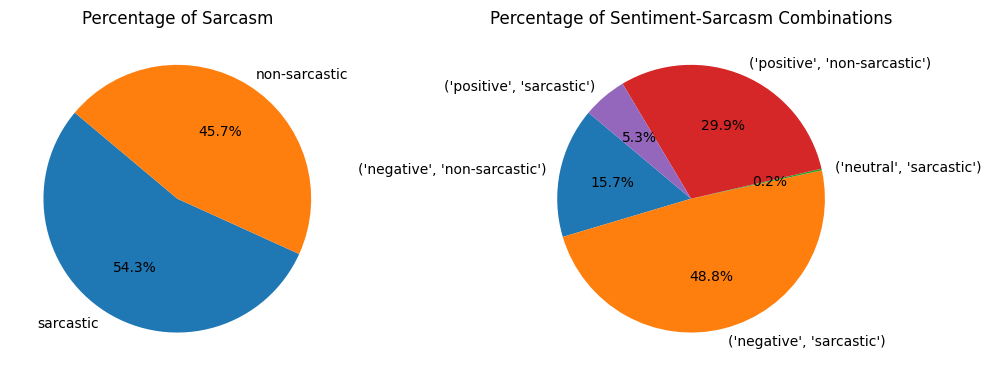

In [48]:
# Plot the data
import matplotlib.pyplot as plt

# Plotting the percentage of sarcasm
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sarcasm_percentage, labels=sarcasm_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sarcasm')

# Plotting the percentage of each combination of sentiment and sarcasm
plt.subplot(1, 2, 2)
plt.pie(combination_percentage, labels=combination_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sentiment-Sarcasm Combinations')

plt.tight_layout()
plt.show()

In [49]:
# Save the cleaned data to a new CSV file
output_file_path = '/content/drive/MyDrive/IMBD/Clean_data.csv'
df.to_csv(output_file_path, index=False)

In [53]:
data = pd.read_csv('/content/drive/MyDrive/IMBD/Clean_data.csv')
data.shape

(6544, 3)

In [54]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/IMBD/Data_Preprocessing


[NbConvertApp] Converting notebook /content/drive/MyDrive/IMBD/Data_Preprocessing to html
[NbConvertApp] Writing 721860 bytes to /content/drive/MyDrive/IMBD/Data_Preprocessin.html
